# Striking the Right Balance between Attrition and Retention:

### When considering attrition, many leaders tend to focus on the problem of high employee turnover—and for good reason. Recruiting, hiring, and training new employees costs companies billions each year. Companies also suffer lost productivity - and lost profits - when there is a significant amount of constant change in the workforce. Replacing top talent, in particular, can be very difficult and expensive. Financial considerations aside, companies are better off when they can retain good employees and the organizational knowledge they possess.

## The right amount of Attrition - with the right people moving at the right time - is desirable. Not every organization or job is suitable for every person; if an unsuitable employee or a low-performing employee leaves, there is an opportunity to fill the role with a high-performing employee who is best suited for the job. Even if a good employee leaves as a result of “graduation” to work with a client, if he becomes a great ambassador for the company, it can be a positive loss.

# The goal with employee attrition and retention is to strike the right balance of holding on to top talent while accepting that some level of attrition is healthy; 

![Attrition](https://www.springml.com/wp-content/uploads/2020/08/employee-attrition.png)

# Problem Definition

### How does HR Analytics help in analyzing attrition?
### The main Business problem that is being solved here is how can a system be created to help big companies control their attrition by understanding which employee could leave so as to provide him/her some incentives to stay back.

# Importing Libraries

In [4]:
# Import data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#configure
%matplotlib inline  

# Data Collection and Information

In [5]:
#read the dataset
df=pd.read_csv(r'HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### All total we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

### Hence this is a Binary Classification problem.

In [6]:
#no. of rows and coloumns
df.shape

(1470, 35)

#### Dataset has 1470 rows and 35 coloumns.

# Exploratory Data Analysis

In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

   1. Seems like there are no null values.
   2. Also, some columns have object datatype which means we have to encode.

In [8]:
# check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### There are no null or missing values in data set


In [9]:
# check the stats
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Let us take a look at the columns to select and drop any unwanted columsn like ID

In [10]:
df.columns
df.drop(['EmployeeNumber'],axis = 1,inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# check for duplicate data
df.duplicated().sum()

0

#### No duplicate data found.

In [12]:
# check the value count in target column
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### Data is imbalanced by class we have 1233 people who have not left the company and 237 people who have left the company

# Data Visualization

 ### Univariate Analysis

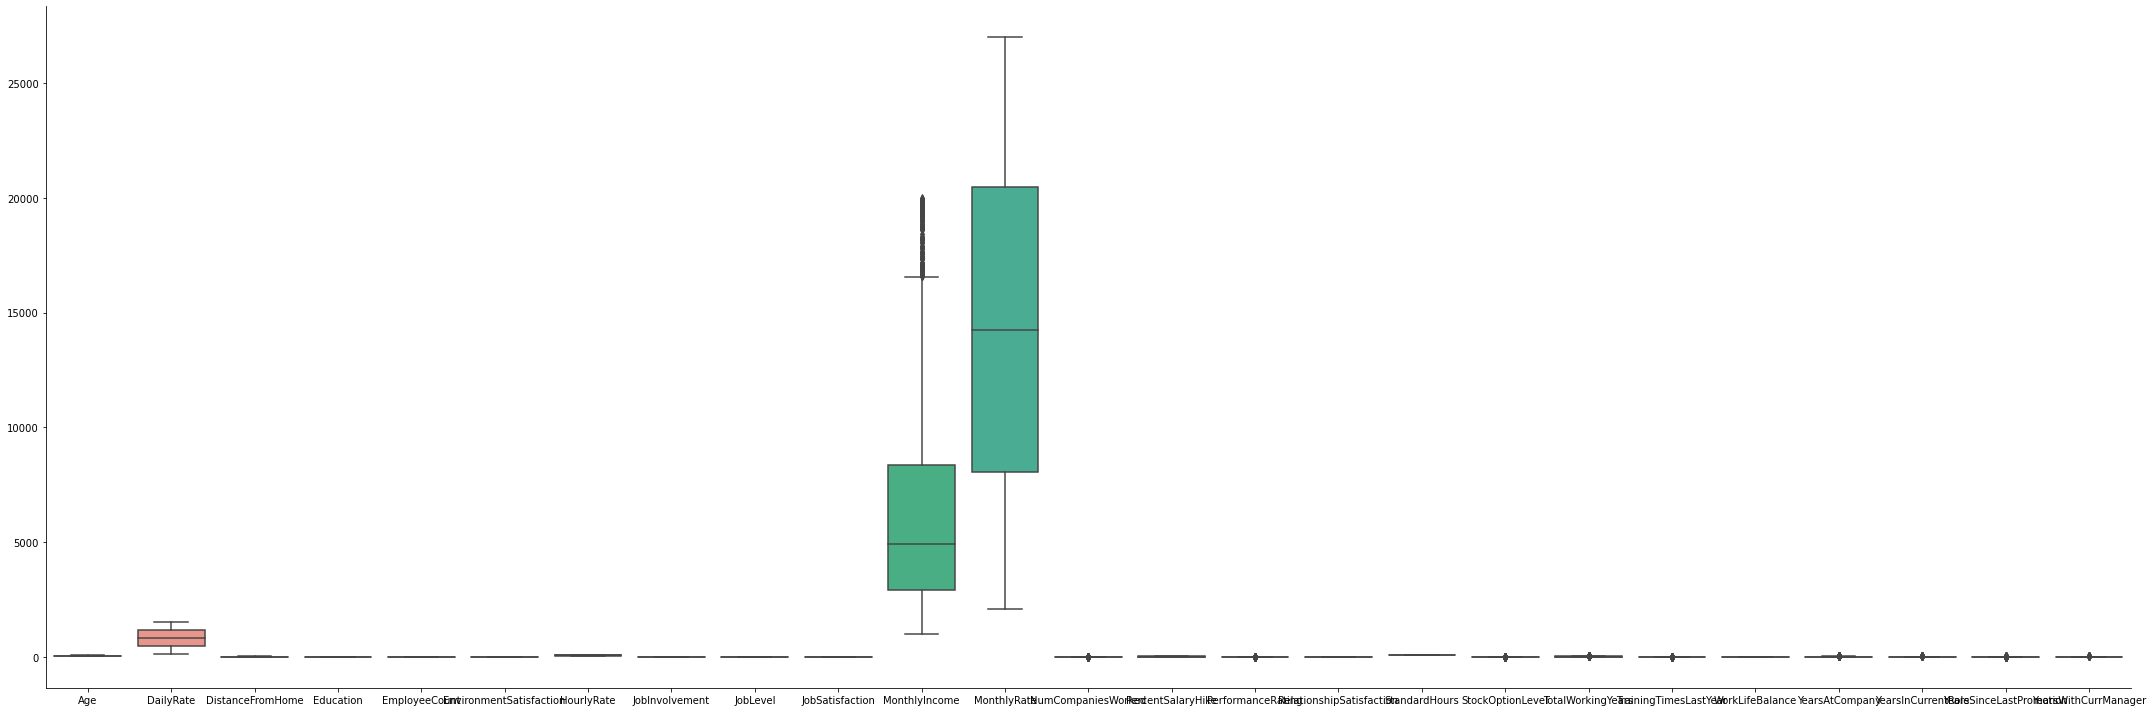

In [13]:
# analyze numeric features

sns.factorplot(data=df,kind='box',size=10,aspect=3)

#### Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

<AxesSubplot:xlabel='Age', ylabel='Density'>

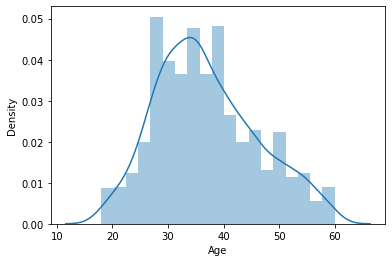

In [14]:
sns.distplot(df['Age'])

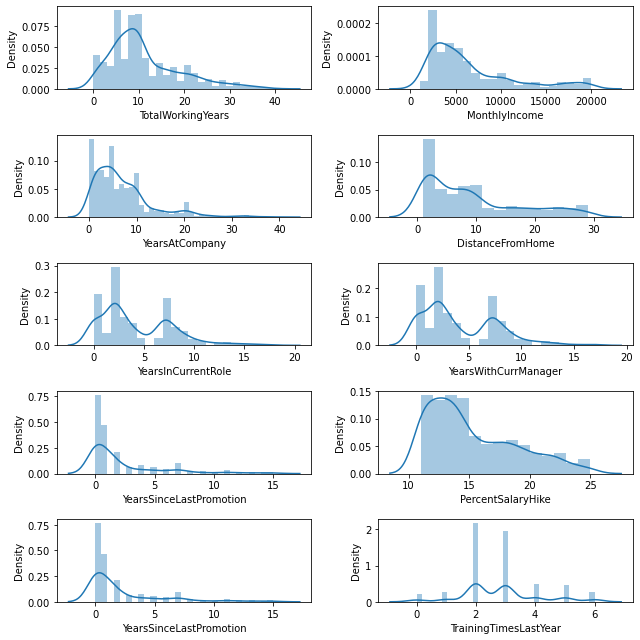

In [15]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()


### Univariate Categorical Analysis

In [16]:
# categorical features

cat_df=df.select_dtypes(include='object')

cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [17]:
# function that accepts the name of the column or attribute which we want to analyze.
# The function then plots the countplot for that feature which makes it easier to visualize.

def plot_ca(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

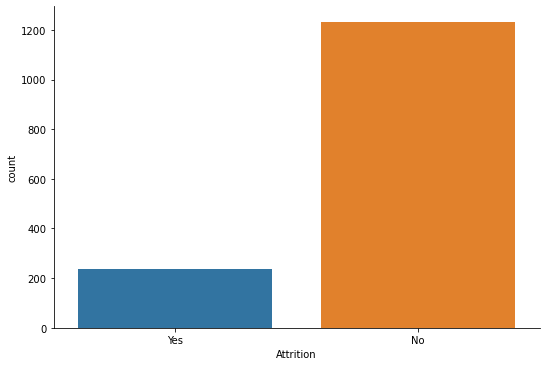

In [18]:
plot_ca('Attrition')   

#### We can observe that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category, hence, target column is skewed and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. We'll do that after the Visualization of other features.

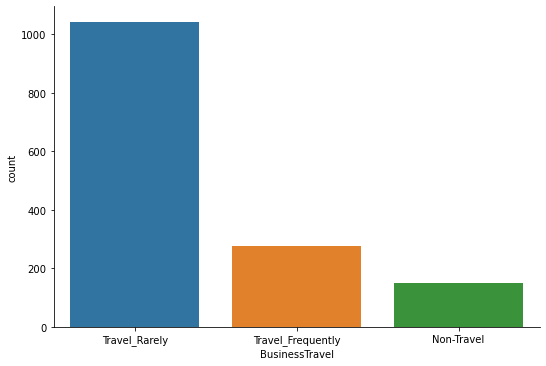

In [19]:
plot_ca('BusinessTravel')   

####  The plot above clearly shows that most people belong to the "Travel_Rarely" class. This indicates that most people did not have jobs that required them to travel frequently.

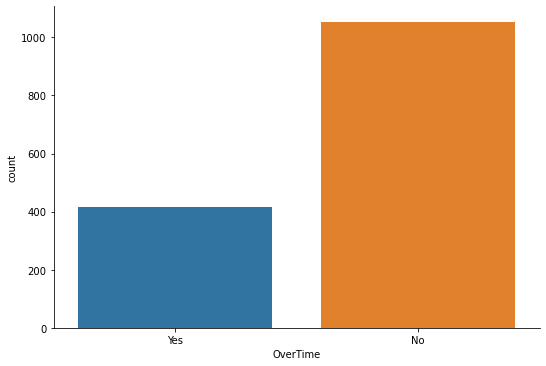

In [20]:
plot_ca('OverTime')

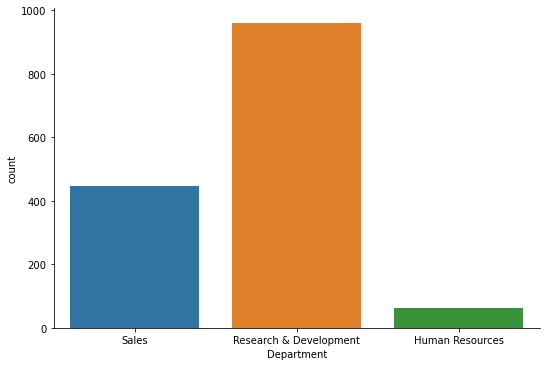

In [21]:
plot_ca('Department')   

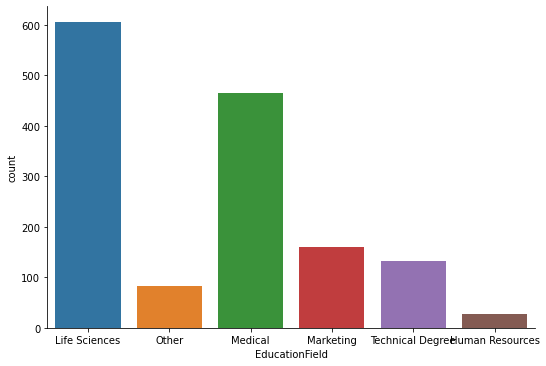

In [22]:
plot_ca('EducationField')

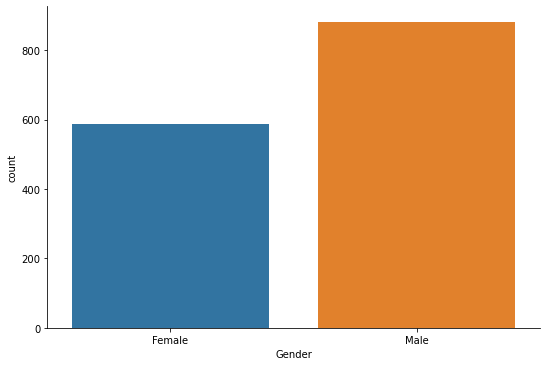

In [23]:
plot_ca('Gender') 

#### We can observe that, males are presnt in higher number.

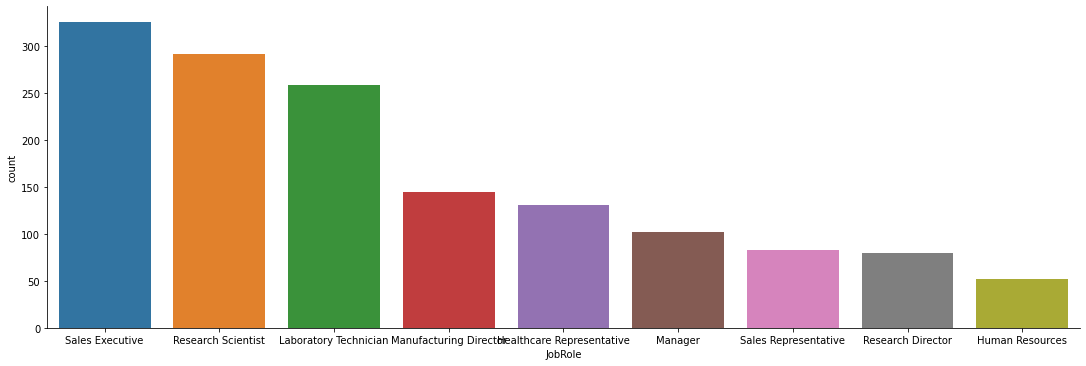

In [24]:
plot_ca('JobRole')   

#### Most of the Employees had "Sales Executive" job role.

### Univariate Numerical Category Analysis

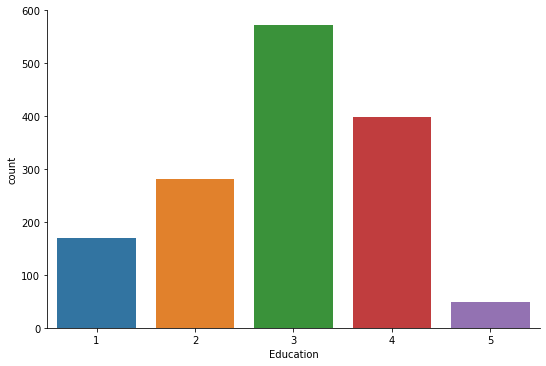

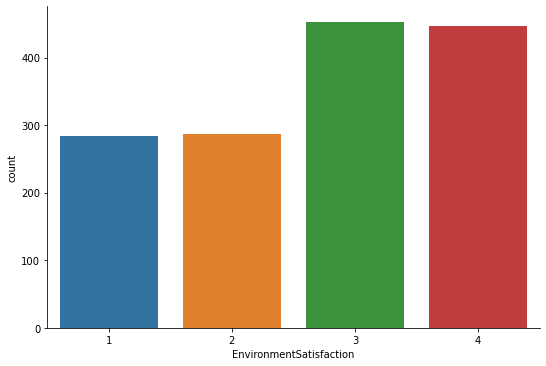

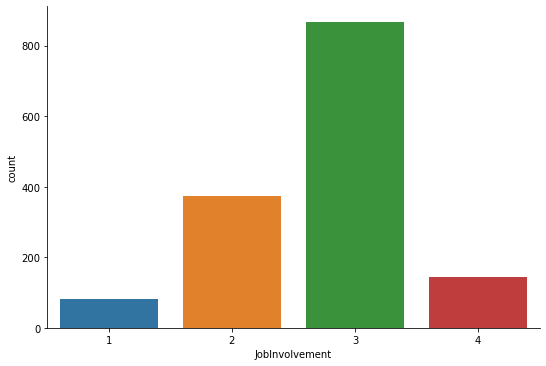

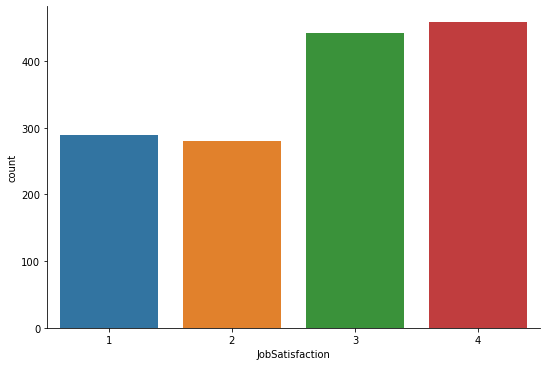

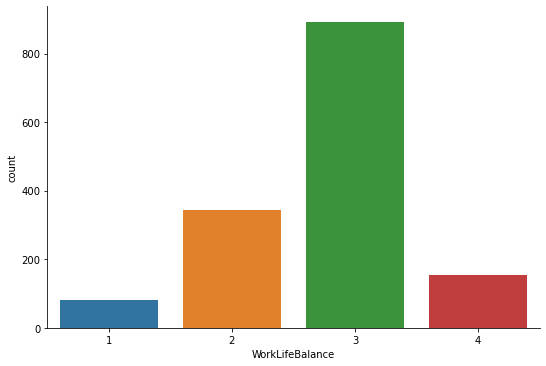

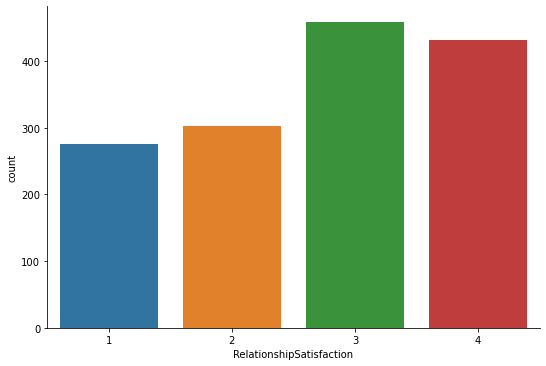

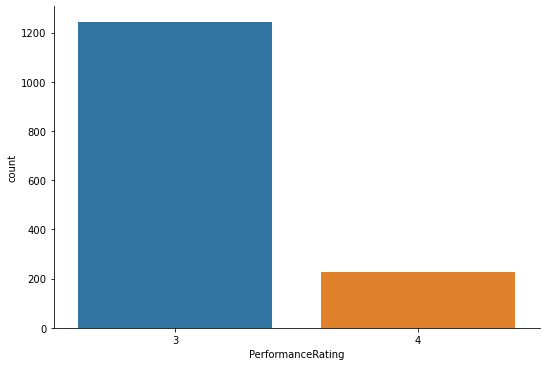

In [25]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_ca(i)


## Corelation b/w Features

<AxesSubplot:>

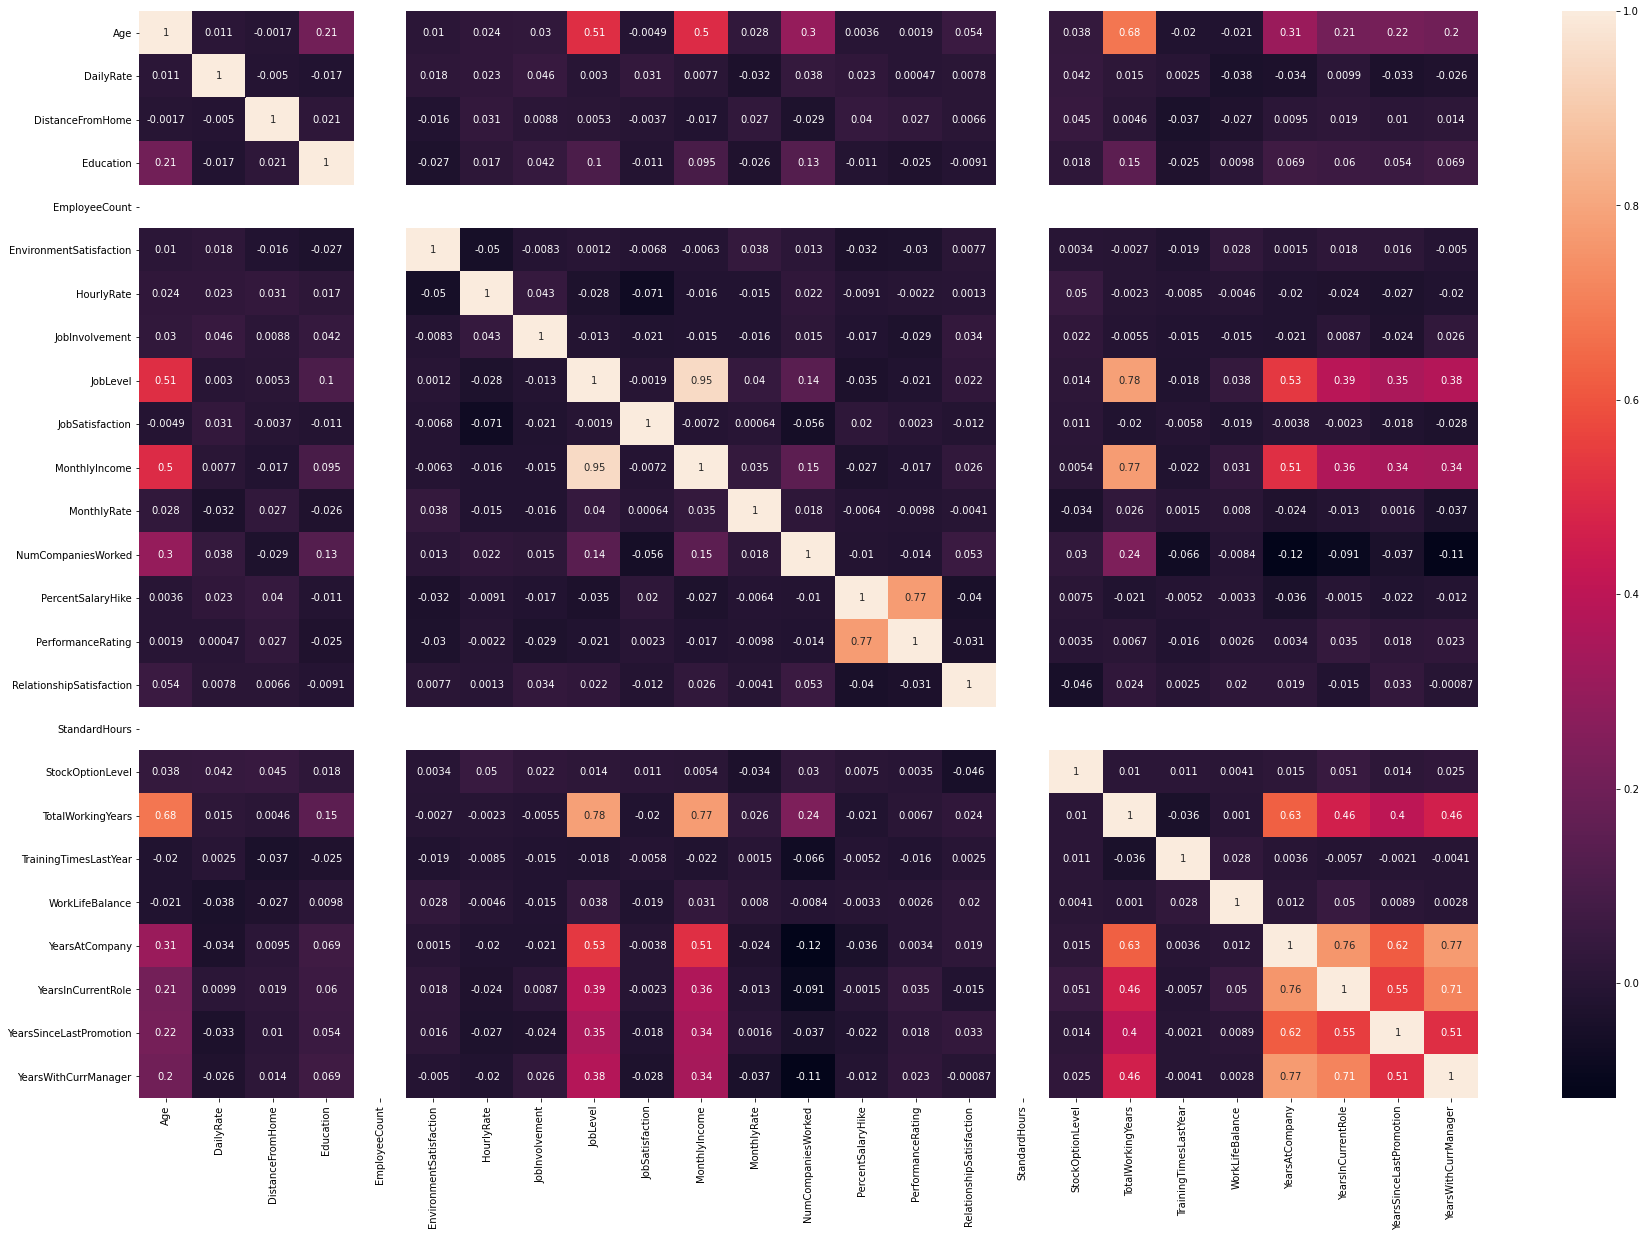

In [26]:
#corelation matrix.
cor_mat= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=cor_mat,annot=True)

#### Inferences:
   1. "JobLevel" is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

   2. "MonthlyIncome" is very strongly related to joblevel as expected as senior employees will definately earn more.

   3. "PerformanceRating" is highly related to PercentSalaryHike which is quite obvious.

   4. Also note that "TotalWorkingYears" is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

   5. "YearsWithCurrManager" is highly related to "YearsAtCompany".

   6. "YearsAtCompany" is related to "YearsInCurrentRole".

<p>Note: that we can drop some <b>highly corelated features</b> as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like <b>Principal Component Analysis(PCA)</b> to reduce our feature space.</p>

####  Plotting the Features against the 'Target' variable.



<p><b>Age</b></p>

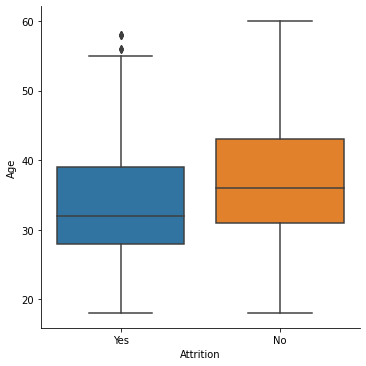

In [27]:
# Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

#### We can observe that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

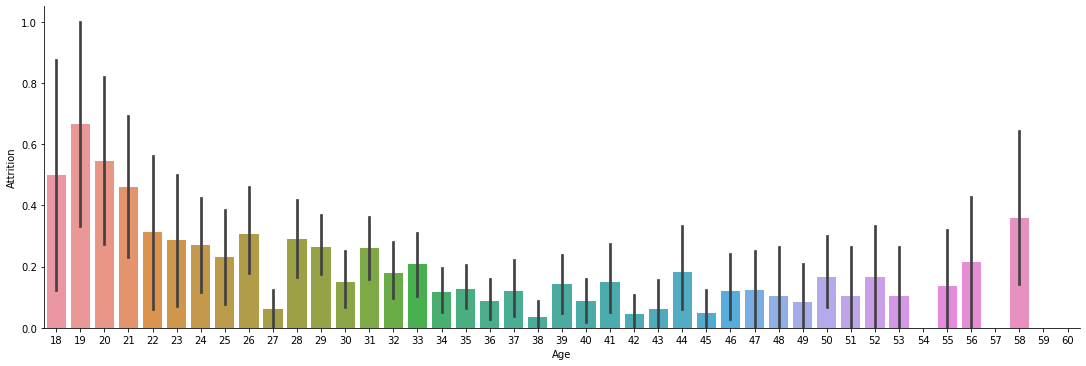

In [78]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

#### Younger people have a higher rate of attrition compared to older people.

<p><b>Department</b></p>

In [28]:
# Both Attrition(Target) as well as the Deaprtment are categorical. 
# In such cases a cross-tabulation is the most reasonable way to analyze the trends; 
# which shows clearly the number of observations for each class which makes it easier to analyze the results

df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

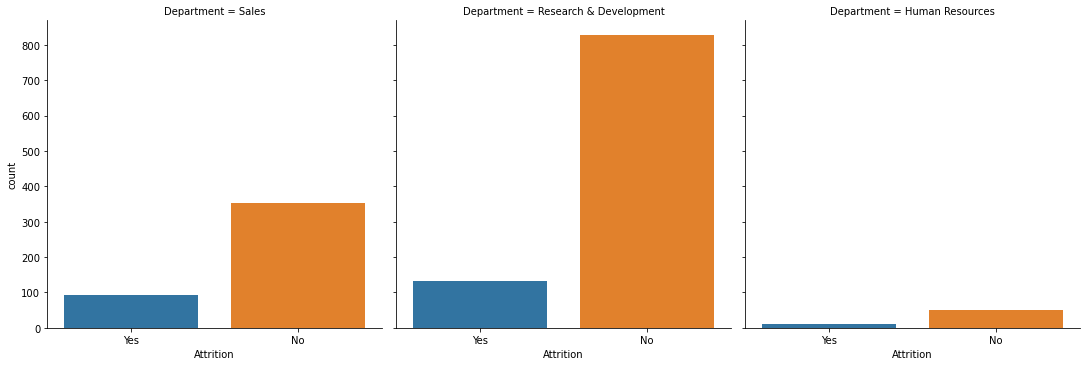

In [29]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [30]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


#### Most of the observations corresspond to 'No' as we saw before , also about 81% of the people in HR do not want to leave the organisation and only 19% want to leave. Similarly, 13% of the people in R&D and 20% of the peoplr in Sales want to leave.

#### Gender

In [31]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins = True, normalize = 'index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


#### About 83% of Males want to stay in the organisation while only 17% want to leave the organisation. All in all 83% of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

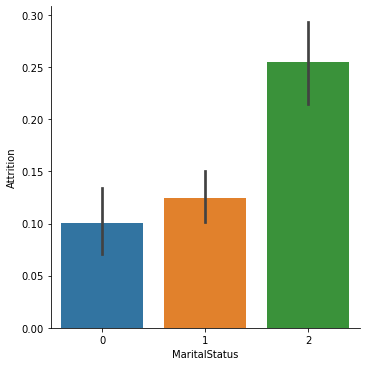

In [77]:
sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

#### Single peopel are more likely to quit compared to married and divorced people.

#### Job level

In [32]:
pd.crosstab(columns = [df.Attrition],index =[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


#### People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes', also people in Joblevel 1 has the least tendency to stay.

#### Monthly Income

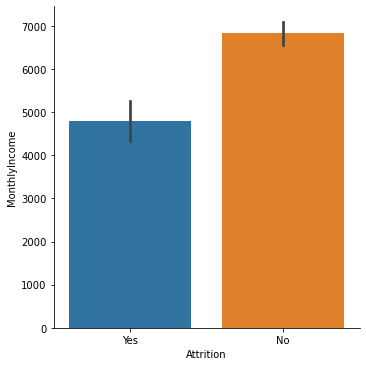

In [33]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

#### The average income for 'No' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

####  Job Satisfaction

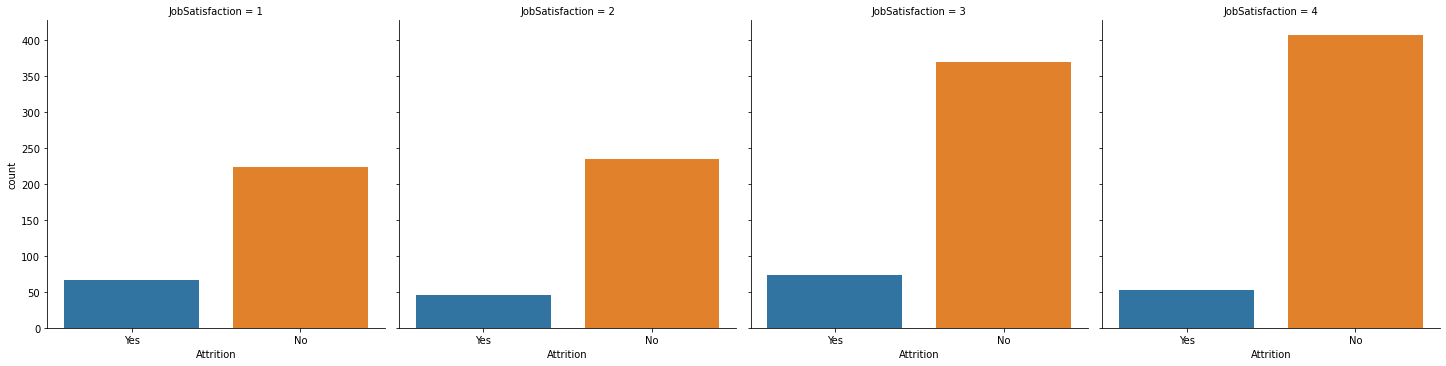

In [34]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


#### This indicates an interesting trend. Note that for higher values of job satisfaction (i.e. a person is more satisfied with their job) a lower percentage of them say 'yes' which is quite clear because highly satisfied workers will avoid their unwillingness to leave the organisation.

#### Environment Satisfaction

In [36]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


#### Again we can note that the relative percentage of 'No' in people with a higher degree of environmental satisfaction.

#### Work Life Balance

In [37]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


#### We noticed a similar trend, as people with a better work-life balance do not want to leave the organization.

#### RelationshipSatisfaction

In [38]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


# EDA Concluding Remarks

   1. The data is unbalanced by class, we have 83% who did not leave the company and 17% who left the company
   2. The age group of IBM employees in this data set is between 25-45 years old
   3. Attrition is more common in younger age groups and is more likely among females As expected, it is more common among single employees
   4. People who leave the company have fewer opportunities to travel around the company.
   5. People with very high education tend to have lower friction
   
#### From the visualization plots we can conclude that below mentioned category are having higher attrition rate:

   1. Sales department among all the departments
   2. Human Resources and Technical Degree in Education
   3. Single’s in Marital status (Will not use this due to GDPR)
   4. Male in comparison to females in Gender (Will not use this due to GDPR)
   5. Employee with job satisfaction value 1
   6. Job level 1 in job level
   7. Life balance having value 1
   8. Employee staying at distant place
   9. Environment Satisfaction value 1

# Pre Processing Pipeline

### Feature Selection

In [39]:
# The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful.
# The better features we use the better our model will perform.

df.drop(['BusinessTravel','DailyRate','EmployeeCount','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

### Feature Encoding

In [40]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [41]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [42]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [43]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


#### Encoding done.

### Feature Scaling

In [44]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [45]:
# Splitting the data into training and test sets

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#  Building Machine Learning Models

### Handling the Imbalanced dataset
##### Note that we have an unbalanced dataset with most observations of one type ("NO") in our case. In this dataset, for example, we have about 84% of the observations with "No" and only 16% with "Yes" and therefore this is an imbalanced dataset.

### Let's deal the imbalanced dataset, Either Oversampling the Minority or Undersampling the Majority Class, but, in our case the number of observations is already pretty low and so oversampling will be more appropriate.

In [46]:
# SMOTE

oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_resample(x_train,y_train)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

clfs = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1), GaussianNB(),
        LogisticRegression(n_jobs=-1),DecisionTreeClassifier(),AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [71]:
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = cross_val_score(cl,x_train_smote,y_train_smote,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.8682681434735258
RandomForestClassifier(n_jobs=-1) 0.9801117882331694
GaussianNB() 0.8012116383811483
LogisticRegression(n_jobs=-1) 0.8563384360957056
DecisionTreeClassifier() 0.8688606889970043
AdaBoostClassifier() 0.957785943265538
QuadraticDiscriminantAnalysis() 0.8942974901625913
MLPClassifier() 0.9568502297592266
SVC() 0.9568040377069851
***********************************************
Best is... RandomForestClassifier(n_jobs=-1) 0.9801117882331694


#### Note that accuracy is not a good choice. This is because because the data is skewed, an algorithm that categorizes the target as belonging to the majority class at all times will achieve very high accuracy.A classifier that predicts the majority class at all times will also reach an accuracy of 98% but does not convey any useful information.

#### Hence in these type of cases we may use other metrics such as -->

    'Precision'-- (true positives)/(true positives+false positives)

    'Recall'-- (true positives)/(true positives+false negatives)

    'F1 Score'-- The harmonic mean of 'precision' and 'recall'

    'AUC ROC'-- ROC curve is a plot between 'senstivity' (Recall) and '1-specificity' (Specificity=Precision)

    'Confusion Matrix'-- Plot the confusion matrix

In [60]:
# Building A Model & Making Predictions

def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))


In [61]:
acc=[]
prec=[]
rec=[]
auroc=[]

models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.828804,0.458333,0.372881,0.644369
1,RandomForestClassifier,0.858696,0.187500,0.409091,0.648187
2,GradientBoostingClassifier,0.847826,0.291667,0.388889,0.643240
3,KNeighborsClassifier,0.714674,0.625000,0.256410,0.592349


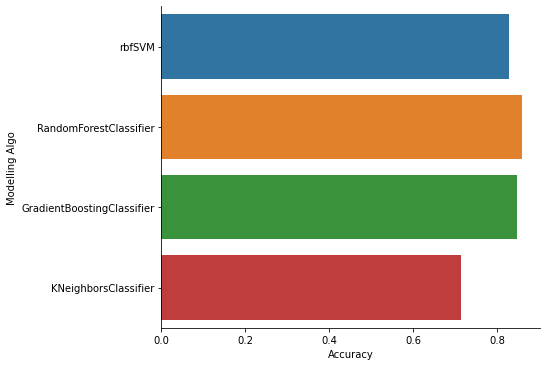

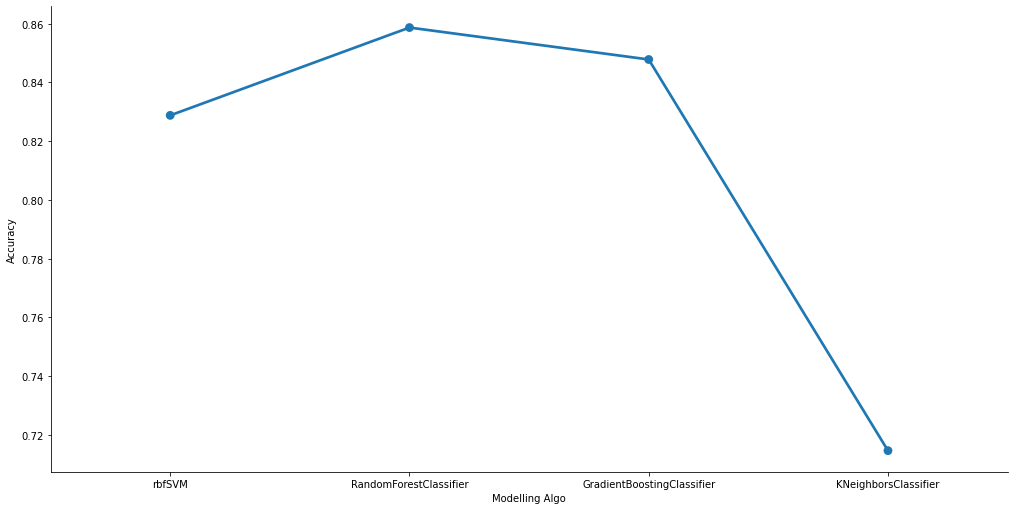

In [62]:
# Comparing Different Models

def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')
    
comp_models(met_df,'Accuracy')

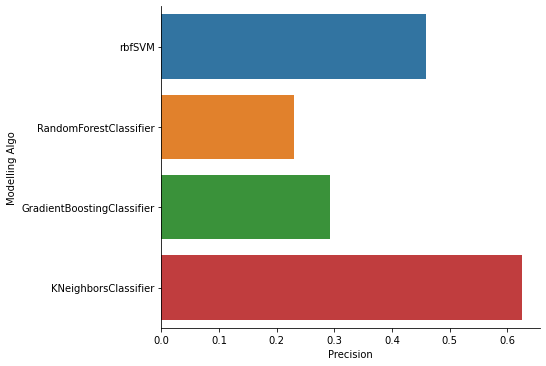

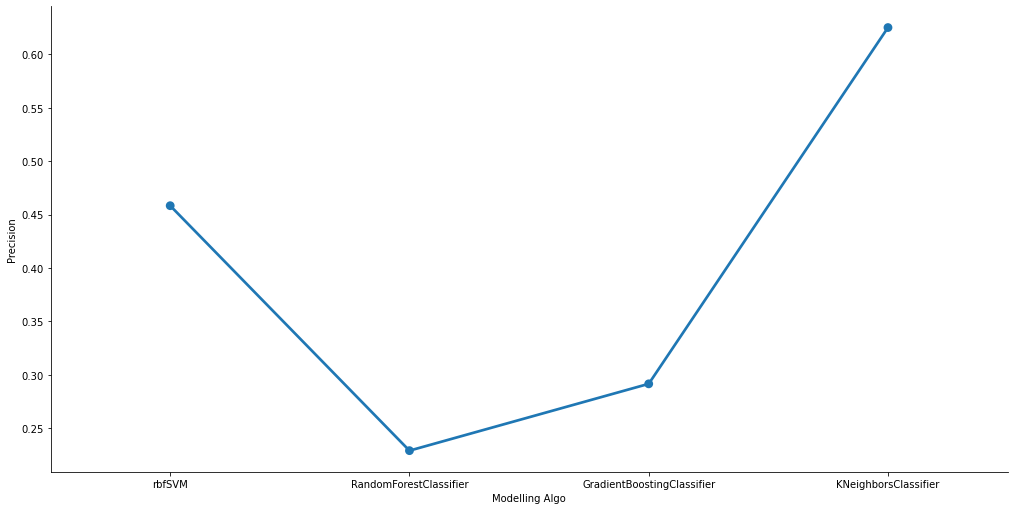

In [50]:
comp_models(met_df,'Precision')

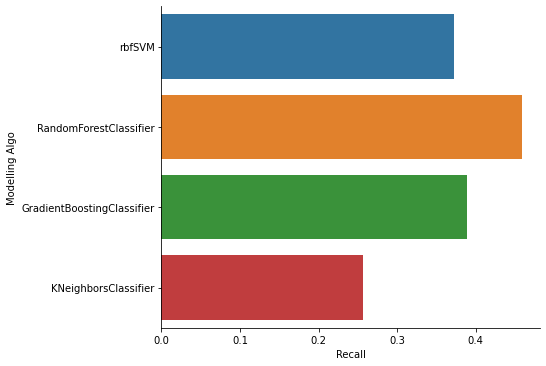

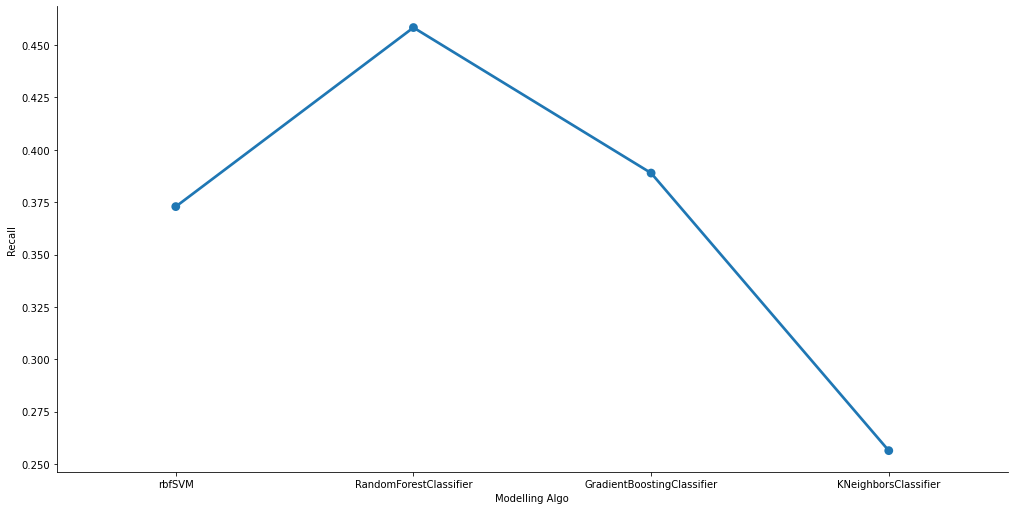

In [51]:
comp_models(met_df,'Recall')

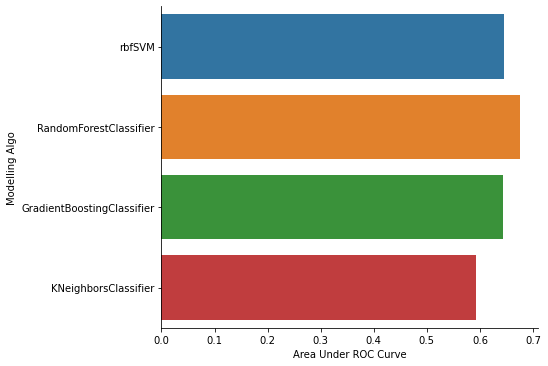

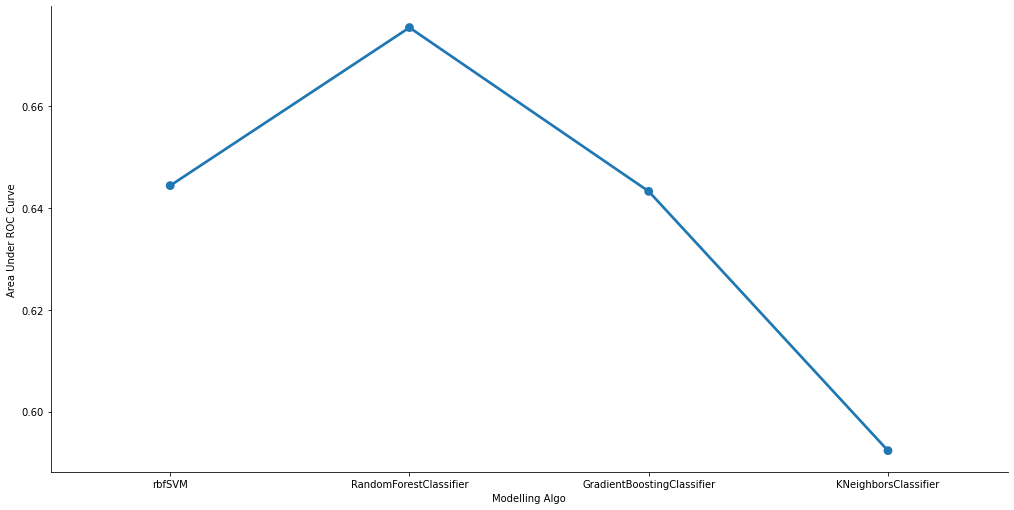

In [52]:
comp_models(met_df,'Area Under ROC Curve')

# Cross Validation (10-fold)

In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10) = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train_smote, y_train_smote, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.934


# Confusion Matrix

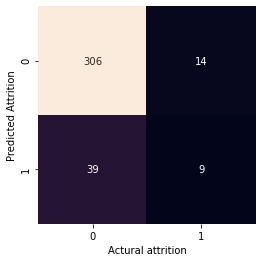

In [68]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

#### 306 + 9 correct predictions and 39+14 incorrect predictions.

In [76]:
from sklearn.metrics import classification_report
clf=modelCV
clf.fit(x_train_smote,y_train_smote)
pred=clf.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       320
           1       0.45      0.21      0.29        48

    accuracy                           0.86       368
   macro avg       0.67      0.59      0.61       368
weighted avg       0.83      0.86      0.84       368



# Save The Model

In [80]:
#saving the model 
import joblib
joblib.dump(clf,'hr.pkl')


['hr.pkl']

In [81]:
loadmodel = joblib.load('hr.pkl')

# Prediction

In [82]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
363,0,0
364,0,0
365,0,0
366,0,0


#### The above dataframe have original data with the predicted data from the best model.

# Concluding Remarks

### We ended up creating an early warning system for our customer to help them predict whether an employee is likely to leave the company or not.

![Thank You](https://qph.fs.quoracdn.net/main-qimg-e8c2d716f454c1b7c63d87e15f175734)